In [1]:
import nltk
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import umap
import hdbscan
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk import download
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
from sentence_transformers import SentenceTransformer

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [4]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [6]:
df.shape

(23486, 11)

In [7]:
df = df.dropna().drop_duplicates()

In [8]:
df.shape

(19662, 11)

In [9]:
df = df.reset_index(drop=True)

In [10]:
df['Division Name'].value_counts()

Division Name
General           11664
General Petite     6778
Initmates          1220
Name: count, dtype: int64

In [11]:
df['Department Name'].value_counts()

Department Name
Tops        8713
Dresses     5371
Bottoms     3184
Intimate    1408
Jackets      879
Trend        107
Name: count, dtype: int64

### Preprocess Text

In [12]:
def clean_text(text):
    # Tokenize the text
    tokenized_text = word_tokenize(text)

    # Remove punctuation
    tokenized_text = [word for word in tokenized_text if word not in string.punctuation]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokenized_text = [word for word in tokenized_text if word not in stop_words]
    
    # Remove tokens that are too short
    tokenized_text = [word for word in tokenized_text if len(word) >= 2]

   # Lemmatize the text
    lemmatizer = WordNetLemmatizer()
    tokenized_text = [lemmatizer.lemmatize(word) for word in tokenized_text]

    # Join the words into a single string
    cleaned_text = ' '.join(tokenized_text)
    
    return cleaned_text

In [13]:
df['Review Text'][1]

"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!"

In [14]:
df['toks'] = df['Review Text'].apply(clean_text)

### Bertopic Default

In [16]:
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")

In [17]:
model = BERTopic(
    vectorizer_model=vectorizer_model,
    language='english', calculate_probabilities=True,
    verbose=True
)

In [18]:
topics, probs = model.fit_transform(df['toks'])

Batches:   0%|          | 0/615 [00:00<?, ?it/s]

2024-02-26 17:16:09,584 - BERTopic - Transformed documents to Embeddings
2024-02-26 17:16:52,637 - BERTopic - Reduced dimensionality


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2024-02-26 17:17:04,805 - BERTopic - Clustered reduced embeddings


In [19]:
freq = model.get_topic_info()
freq.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,8963,-1_dress_fit_size_nt,"[dress, fit, size, nt, love, color, look, like...",[This dress beautiful love collar tie neck det...
1,0,1175,0_sweater_love sweater_itchy_soft,"[sweater, love sweater, itchy, soft, sleeve, c...",[This sweater look heavy online bit thin sweat...
2,1,1073,1_shirt_tshirt_love shirt_love,"[shirt, tshirt, love shirt, love, nt, fit, sof...",[love t-shirt moss green color wanted cute fit...
3,2,763,2_skirt_love skirt_waist_size,"[skirt, love skirt, waist, size, great, fit, l...",[love skirt unique flattering clothes like ski...
4,3,607,3_jean_pair_stretch_ag,"[jean, pair, stretch, ag, denim, pilcro, fit, ...",[Purchased jean 27 usually 28 skinny jean got ...
5,4,531,4_blouse_love blouse_size_fit,"[blouse, love blouse, size, fit, nt, look, fab...",[This blouse run large billow slightly hang bo...
6,5,500,5_jacket_coat_love jacket_small,"[jacket, coat, love jacket, small, medium, war...",[Saw hanging store cute front back flattering ...
7,6,480,6_dress_size_fit_lb,"[dress, size, fit, lb, chest, bust, small, wai...",[This dress seems quite high quality wonderful...
8,7,458,7_love_cute_like_nt,"[love, cute, like, nt, really, boxy, look, gre...",[disagree previous review saying top unflatter...
9,8,374,8_dress_size_run_large,"[dress, size, run, large, small, dress run, we...",[This dress absolutely stunning color vibrant ...


In [20]:
freq_df = model.get_topic_info()
print("Number of topics: {}".format( len(freq_df)))

Number of topics: 98


In [21]:
# to get visualizations
import plotly.io as pio
pio.renderers.default='iframe'

In [22]:
model.visualize_barchart()

### FINE TUNNING BERTOPIC

#### Transformer Embedding

In [20]:
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

In [21]:
embedding_model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 256, 'do_lower_case': False}) with Transformer model: BertModel 
  (1): Pooling({'word_embedding_dimension': 384, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
  (2): Normalize()
)

In [22]:
sentences_list = df['toks'].tolist()

In [23]:
embeds = embedding_model.encode(sentences_list)

### Dimensionality Reduction UMAP

In [24]:
fit = umap.UMAP(n_neighbors=3, n_components=3, min_dist=0.05)  
u = fit.fit_transform(embeds)

/home/studio-lab-user/.conda/envs/default/lib/python3.9/site-packages/matplotlib/collections.py:981: RuntimeWarning:

invalid value encountered in sqrt



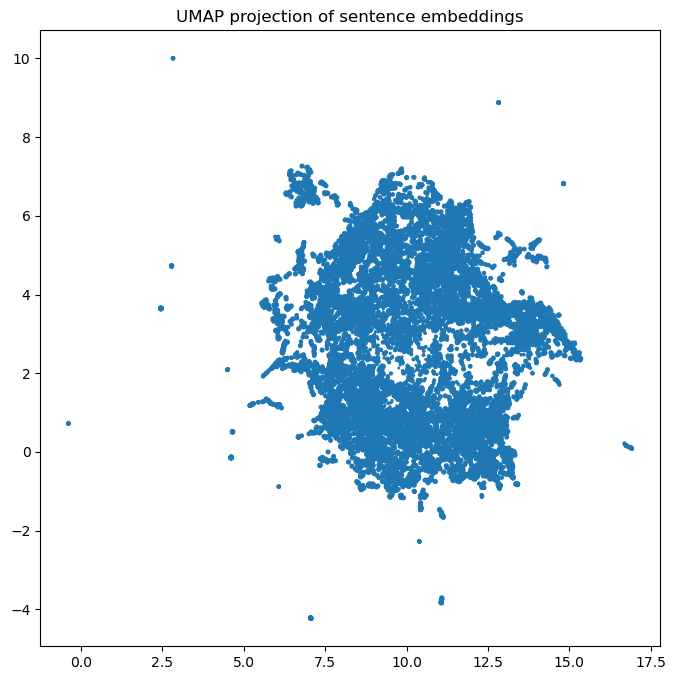

In [30]:
plt.figure(figsize=(8,8)) # Increase figure size
plt.scatter(u[:, 0], u[:, 1], u[:, 2])
plt.title('UMAP projection of sentence embeddings')
plt.show()

### HDBSCAN CLUSTERING

In [32]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=500, min_samples=300, gen_min_span_tree=True)
clusterer.fit(u)

HDBSCAN(gen_min_span_tree=True, min_cluster_size=500, min_samples=300)

<AxesSubplot:ylabel='$\\lambda$ value'>

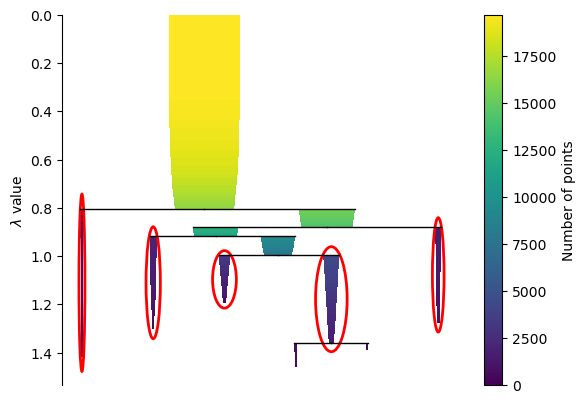

In [33]:
clusterer.condensed_tree_.plot(select_clusters=True)

In [34]:
print(clusterer.relative_validity_)

0.20651162852539864


### FINE TUNED BERTOPIC

In [37]:
umap_model = umap.UMAP(n_components=3, n_neighbors=100, min_dist=0.05)

In [38]:
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size=500, min_samples=300, gen_min_span_tree=True, prediction_data=True)

In [39]:
model = BERTopic(
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    embedding_model=embedding_model,
    vectorizer_model=vectorizer_model,
    top_n_words=5,
    language='english',
    calculate_probabilities=True,
    verbose=True
)

In [40]:
topics, probs = model.fit_transform(df['toks'])

Batches:   0%|          | 0/615 [00:00<?, ?it/s]

2024-02-26 17:24:36,589 - BERTopic - Transformed documents to Embeddings
2024-02-26 17:25:15,673 - BERTopic - Reduced dimensionality
2024-02-26 17:25:19,497 - BERTopic - Clustered reduced embeddings


In [41]:
freq = model.get_topic_info()
freq.head(10)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,7691,-1_size_fit_love_color,"[size, fit, love, color, like]",[love way t-shirt fit horseshoe opening front ...
1,0,4123,0_dress_fit_size_love,"[dress, fit, size, love, like]",[Love dress ... light comfortable fit true siz...
2,1,2216,1_love_like_fit_look,"[love, like, fit, look, size]",[The material lace nice soft stiff lace '' 36d...
3,2,1837,2_sweater_jacket_love_coat,"[sweater, jacket, love, coat, color]",[This great sweater soft beautiful 's new go s...
4,3,1587,3_pant_jean_fit_pair,"[pant, jean, fit, pair, size]",[probably 10 pair pilcro jean pant jean skinny...
5,4,1084,4_shirt_love_fit_color,"[shirt, love, fit, color, great]",[really fell love shirt 110 pound ordered xx g...
6,5,621,5_skirt_size_fit_waist,"[skirt, size, fit, waist, love]",[This beautiful skirt exactly pictured color b...
7,6,503,6_blouse_size_fit_love,"[blouse, size, fit, love, look]",[Great blouse curvy woman 'm always xl retaile...


In [42]:
freq_df = model.get_topic_info()
print("Number of topics: {}".format( len(freq_df)))

Number of topics: 8


In [86]:
model.visualize_barchart()

In [87]:
model.visualize_topics()

In [88]:
model.visualize_documents(df['toks'], embeddings=embeds)